In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [3]:
raw = pd.read_csv('/Users/dereklee/biostat-masters-thesis/mimic3c.csv')
raw.head()

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,0.16,2.59,0.00,na,1.30,25.12,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,2
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,WHITE,0.25,2.23,0.99,Endosc control gast hem,1.98,13.61,55.94,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,2
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,0.00,0.75,0.17,Non-invasive mech vent,0.83,11.46,33.39,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,4
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,WHITE,0.41,0.69,0.27,Part sm bowel resect NEC,0.69,20.30,32.24,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,2
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,WHITE,0.00,3.69,0.82,Aortocor bypas-3 cor art,2.25,20.49,50.61,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,2


In [5]:
raw.describe()

,hadm_id,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.00000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,149970.809584,53.005884,10.114955,0.099374,2.67596,0.785599,1.074118,30.379017,46.421124,1.219913,6.464789,7.111594,9.593702,0.691903,1.093313,528.505172,0.099261,636.115579,2.360248
std,28883.095213,26.028120,12.456231,0.163437,8.26559,3.558090,2.027148,62.430163,76.061561,4.236693,106.709903,7.551822,12.601338,2.117615,3.169441,640.250063,0.299014,783.938087,1.130337
min,100001.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,124952.750000,43.000000,3.710000,0.000000,0.82000,0.210000,0.000000,4.850000,26.980000,0.160000,0.140000,1.750000,4.330000,0.000000,0.380000,207.410000,0.000000,267.407500,1.000000
50%,149989.500000,59.000000,6.460000,0.000000,1.41000,0.420000,0.970000,13.990000,38.520000,0.510000,0.330000,5.310000,8.370000,0.000000,0.650000,417.875000,0.000000,497.335000,2.000000
75%,174966.500000,73.000000,11.790000,0.160000,2.40000,0.710000,1.560000,34.360000,50.860000,1.350000,0.770000,10.490000,12.270000,0.880000,1.060000,700.302500,0.000000,811.382500,3.000000
max,199999.000000,89.000000,294.630000,4.760000,450.00000,275.000000,225.000000,6825.000000,5175.000000,375.000000,7500.000000,375.000000,750.000000,100.000000,125.000000,49325.000000,1.000000,68600.000000,4.000000


In [6]:
raw.info()

# some na's in AdmitDiagnosis, religion, marital_status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 28 columns):
hadm_id             58976 non-null int64
gender              58976 non-null object
age                 58976 non-null int64
LOSdays             58976 non-null float64
admit_type          58976 non-null object
admit_location      58976 non-null object
AdmitDiagnosis      58951 non-null object
insurance           58976 non-null object
religion            58518 non-null object
marital_status      48848 non-null object
ethnicity           58976 non-null object
NumCallouts         58976 non-null float64
NumDiagnosis        58976 non-null float64
NumProcs            58976 non-null float64
AdmitProcedure      58976 non-null object
NumCPTevents        58976 non-null float64
NumInput            58976 non-null float64
NumLabs             58976 non-null float64
NumMicroLabs        58976 non-null float64
NumNotes            58976 non-null float64
NumOutput           58976 non-null float64
N

In [7]:
# some na's in AdmitDiagnosis, religion, marital_status

# raw[raw.religion.isna()]

raw.marital_status.unique()


array(['DIVORCED', 'SINGLE', 'MARRIED', nan, 'WIDOWED',
       'UNKNOWN (DEFAULT)', 'SEPARATED', 'LIFE PARTNER'], dtype=object)

In [8]:
# raw.AdmitDiagnosis.unique() # need to organize these diagnoses again...
# raw.AdmitProcedure.unique() # free text
# raw.ExpiredHospital.unique() # 0,1
# raw.LOSdays.unique() # continuous
# (raw.LOSdays < 0).sum() # no negatives
# raw[raw.LOSdays=="na"] # no NAs

# raw.LOSgroupNum.unique() # array([2, 4, 3, 1])
# raw.NumCPTevents.unique() # no negatives, continuous (but why are there decimals?)
# raw.NumCallouts.unique() # continuous (but why are there decimals?)
# (raw.NumChartEvents < 0).sum() # no negatives, continuous (but why are there decimals?)
# raw.NumDiagnosis.unique() # no negatives, continuous (but why are there decimals?)
# raw.NumInput.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumInput < 0).sum()
# raw.NumLabs.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumLabs < 0).sum() 
# raw.NumMicroLabs.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumMicroLabs < 0).sum()
# raw.NumNotes.unique() # no negatives, continuous (but why are there decimals?)


# raw.NumOutput.unique() # no negatives, continuous (but why are there decimals?)


# raw.NumProcEvents.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumProcEvents < 0).sum() 

# raw.NumProcs.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumProcs < 0).sum() # no negatives, continuous (but why are there decimals?)

# raw.NumRx.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumRx < 0).sum() 

# raw.NumTransfers.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumTransfers < 0).sum() 

# raw.TotalNumInteract.unique() # no negatives, continuous (but why are there decimals?)
# (raw.TotalNumInteract < 0).sum() 

# raw.admit_location.unique() # clean up text categories
# raw.admit_type.unique() # cleaned!
# raw.age.unique() # continuous
# raw.ethnicity.unique() # clean up text categories

# raw.gender.unique() # ['F', 'M']
 

# raw.insurance.unique() # cleaned unless want to collapse further
# raw.marital_status.unique() # missing values
# raw.religion.unique() # Check distributions to see if need to collapse religions


# max(raw.hadm_id.value_counts()) # only one row per patient

## Missing Values:

In [9]:
raw.AdmitDiagnosis.isna().sum() # 25 missing
raw.religion.isna().sum() # 458 missing
raw.marital_status.isna().sum() # 10128 missing

raw.religion.unique()

raw.marital_status.unique()


array(['DIVORCED', 'SINGLE', 'MARRIED', nan, 'WIDOWED',
       'UNKNOWN (DEFAULT)', 'SEPARATED', 'LIFE PARTNER'], dtype=object)

In [10]:
raw.ethnicity.unique()

array(['WHITE', 'BLACK/AFRICAN AMERICAN', 'HISPANIC OR LATINO',
       'UNKNOWN/NOT SPECIFIED', 'MULTI RACE ETHNICITY', 'ASIAN',
       'WHITE - RUSSIAN', 'OTHER', 'BLACK/CAPE VERDEAN', 'BLACK/HAITIAN',
       'UNABLE TO OBTAIN', 'ASIAN - KOREAN',
       'HISPANIC/LATINO - SALVADORAN', 'WHITE - OTHER EUROPEAN',
       'PATIENT DECLINED TO ANSWER', 'HISPANIC/LATINO - PUERTO RICAN',
       'HISPANIC/LATINO - GUATEMALAN', 'WHITE - BRAZILIAN',
       'ASIAN - CHINESE', 'BLACK/AFRICAN',
       'AMERICAN INDIAN/ALASKA NATIVE', 'ASIAN - ASIAN INDIAN',
       'HISPANIC/LATINO - DOMINICAN',
       'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
       'ASIAN - OTHER', 'PORTUGUESE', 'HISPANIC/LATINO - CUBAN',
       'ASIAN - FILIPINO', 'WHITE - EASTERN EUROPEAN',
       'ASIAN - CAMBODIAN', 'ASIAN - VIETNAMESE',
       'HISPANIC/LATINO - COLOMBIAN', 'SOUTH AMERICAN', 'MIDDLE EASTERN',
       'HISPANIC/LATINO - HONDURAN', 'HISPANIC/LATINO - MEXICAN',
       'NATIVE HAWAIIAN OR OTHER P

In [11]:
raw_completecase = raw.dropna()

In [12]:
raw_completecase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48588 entries, 0 to 58975
Data columns (total 28 columns):
hadm_id             48588 non-null int64
gender              48588 non-null object
age                 48588 non-null int64
LOSdays             48588 non-null float64
admit_type          48588 non-null object
admit_location      48588 non-null object
AdmitDiagnosis      48588 non-null object
insurance           48588 non-null object
religion            48588 non-null object
marital_status      48588 non-null object
ethnicity           48588 non-null object
NumCallouts         48588 non-null float64
NumDiagnosis        48588 non-null float64
NumProcs            48588 non-null float64
AdmitProcedure      48588 non-null object
NumCPTevents        48588 non-null float64
NumInput            48588 non-null float64
NumLabs             48588 non-null float64
NumMicroLabs        48588 non-null float64
NumNotes            48588 non-null float64
NumOutput           48588 non-null float64
N

In [13]:
len(raw_completecase.AdmitDiagnosis.unique())

15025

In [14]:
# there are some string na labels here. If we aren't using this column we can probably ignore

raw_completecase[raw_completecase.AdmitProcedure=='na']



,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,0.16,2.59,0.00,na,1.30,25.12,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,2
13,100020,M,58,10.58,EMERGENCY,EMERGENCY ROOM ADMIT,HYPONATREMIA,Private,CATHOLIC,MARRIED,WHITE,0.09,1.70,0.00,na,1.70,1.42,32.23,0.66,0.37,1.80,5.20,0.19,0.47,87.33,0,133.16,3
29,100040,M,30,2.88,EMERGENCY,CLINIC REFERRAL/PREMATURE,BLUNT TRAUMA,Private,NOT SPECIFIED,MARRIED,BLACK/AFRICAN AMERICAN,0.35,0.69,0.00,na,2.08,15.97,36.11,0.35,1.20,9.72,16.32,2.78,1.39,471.88,0,558.84,1
45,100065,M,59,3.79,EMERGENCY,EMERGENCY ROOM ADMIT,DIABETIC KETOACIDOSIS,Private,NOT SPECIFIED,MARRIED,BLACK/AFRICAN AMERICAN,0.26,1.32,0.00,na,1.58,21.11,68.07,0.26,0.28,1.06,8.18,0.00,0.79,204.75,0,307.66,1
48,100069,F,33,0.71,EMERGENCY,PHYS REFERRAL/NORMAL DELI,ORGAN DONOR ACCOUNT,Private,CATHOLIC,DIVORCED,WHITE,0.00,1.41,0.00,na,1.41,415.49,460.56,9.86,23.80,40.85,0.00,0.00,2.82,2919.72,1,3875.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58951,199958,M,45,5.71,EMERGENCY,CLINIC REFERRAL/PREMATURE,ASTHMA;COPD EXACERBATIOM,Medicare,OTHER,MARRIED,BLACK/AFRICAN AMERICAN,0.18,1.40,0.00,na,1.23,0.00,23.29,0.35,0.18,1.05,5.08,0.18,0.88,136.95,0,170.77,2
58953,199961,M,58,13.54,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,T8-T9 FRACTURE-UPPER BACK PAIN,Private,CATHOLIC,MARRIED,WHITE,0.00,0.66,0.00,na,0.37,7.61,19.87,0.37,0.10,7.53,3.32,0.00,0.30,400.81,0,440.94,4
58957,199967,F,82,9.79,EMERGENCY,CLINIC REFERRAL/PREMATURE,STROKE/TIA,Medicare,NOT SPECIFIED,SINGLE,WHITE,0.10,1.53,0.00,na,1.23,3.37,30.95,0.20,0.03,2.35,9.40,0.61,0.72,197.45,0,247.94,3
58967,199986,F,73,2.79,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,MYOCARDIAL INFARCTION\CATH,Medicare,PROTESTANT QUAKER,WIDOWED,WHITE,0.00,2.51,2.15,na,0.00,43.73,40.86,0.00,0.90,6.45,13.98,0.00,1.08,469.89,0,581.55,1


## Collapsing categorical variable's categories:

## Graphs:

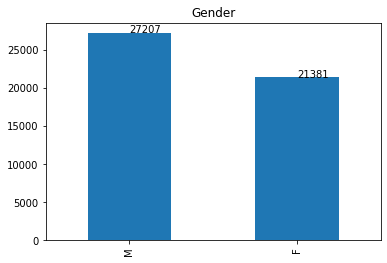

In [25]:
from scipy import stats
import matplotlib.pylab as plt

%matplotlib inline

(raw_completecase.gender).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.gender.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Gender")

We have 6000 more males than females

Text(0.5, 1.0, 'Histogram of Patient Age when Admitted')

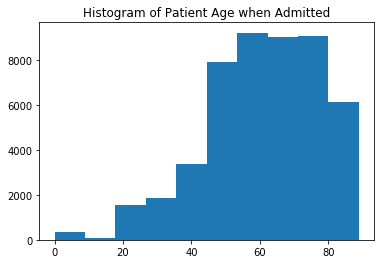

In [26]:
plt.hist(raw_completecase.age)
plt.title("Histogram of Patient Age when Admitted")

Age is left skewed. Will need to try to transform using square root, cube root, or log.

['AdmitDiagnosis',
 'AdmitProcedure',
 'ExpiredHospital',
 'LOSdays',
 'LOSgroupNum',
 'NumCPTevents',
 'NumCallouts',
 'NumChartEvents',
 'NumDiagnosis',
 'NumInput',
 'NumLabs',
 'NumMicroLabs',
 'NumNotes',
 'NumOutput',
 'NumProcEvents',
 'NumProcs',
 'NumRx',
 'NumTransfers',
 'TotalNumInteract',
 'admit_location',
 'admit_type',
 'age',
 'ethnicity',
 'gender',
 'hadm_id',
 'insurance',
 'marital_status',
 'religion']

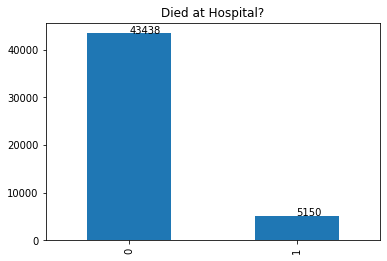

In [27]:
(raw_completecase.ExpiredHospital).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.ExpiredHospital.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Died at Hospital?")

We should probably get rid of those who died since we want Length of Stay, which will be quite different for those who are going to die?

Text(0.5, 1.0, 'LOS in Days')

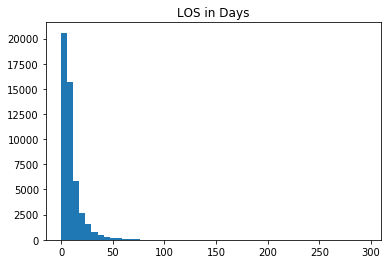

In [28]:
plt.hist(raw_completecase.LOSdays, bins = 50)
plt.title("LOS in Days")

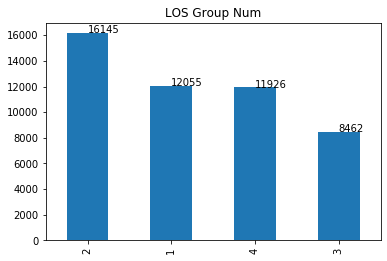

In [29]:
(raw_completecase.LOSgroupNum).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.LOSgroupNum.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("LOS Group Num")

Text(0.5, 1.0, 'Total Number of CPT Events')

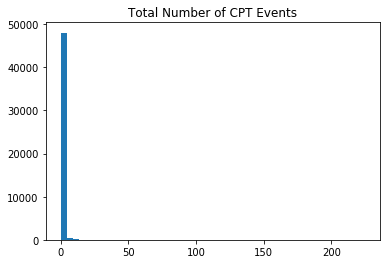

In [30]:
plt.hist(raw_completecase.NumCPTevents, bins = 50)
plt.title("Total Number of CPT Events")

Text(0.5, 1.0, 'Total Number of Callouts')

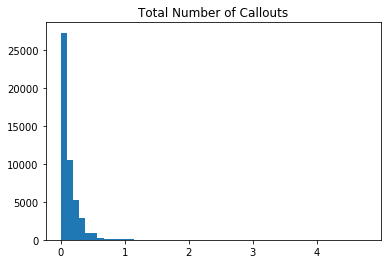

In [31]:
plt.hist(raw_completecase.NumCallouts, bins = 50)
plt.title("Total Number of Callouts")

Text(0.5, 1.0, 'Total Number of Chart Events')

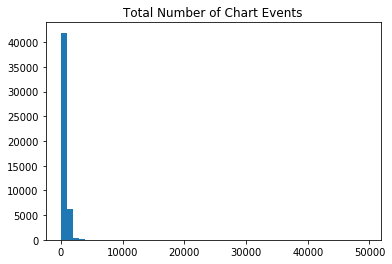

In [32]:
plt.hist(raw_completecase.NumChartEvents, bins = 50)
plt.title("Total Number of Chart Events")

Text(0.5, 1.0, 'Total Number of Diagnoses')

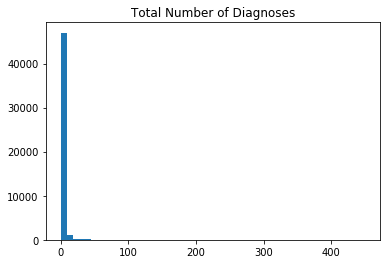

In [33]:
plt.hist(raw_completecase.NumDiagnosis, bins = 50)
plt.title("Total Number of Diagnoses")

Text(0.5, 1.0, 'Total Number of Inputs')

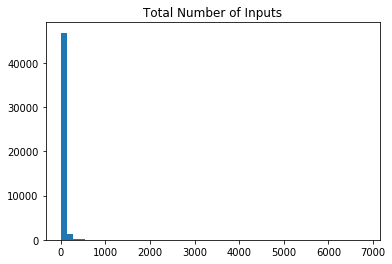

In [34]:
plt.hist(raw_completecase.NumInput, bins = 50)
plt.title("Total Number of Inputs")

Text(0.5, 1.0, 'Total Number of Labs')

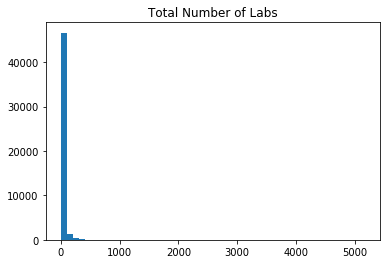

In [35]:
plt.hist(raw_completecase.NumLabs, bins = 50)
plt.title("Total Number of Labs")

Text(0.5, 1.0, 'Total Number of Micro Labs')

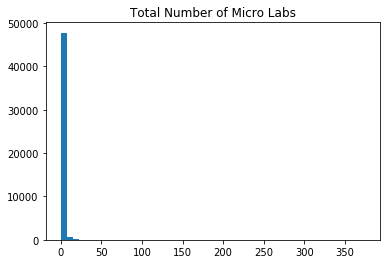

In [36]:
plt.hist(raw_completecase.NumMicroLabs, bins = 50)
plt.title("Total Number of Micro Labs")

Text(0.5, 1.0, 'Total Number of Notes')

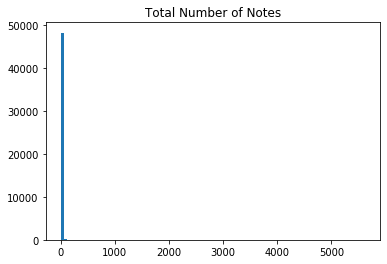

In [37]:
plt.hist(raw_completecase.NumNotes, bins = 100)
plt.title("Total Number of Notes")

In [38]:
max(raw_completecase.NumNotes)

5625.0

Text(0.5, 1.0, 'Total Number of Output')

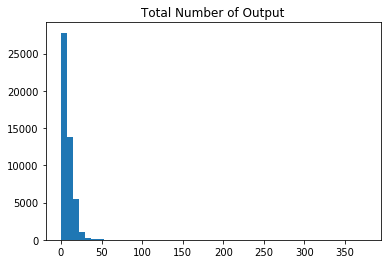

In [39]:
plt.hist(raw_completecase.NumOutput, bins = 50)
plt.title("Total Number of Output")

Text(0.5, 1.0, 'Total Number of Procedure Events')

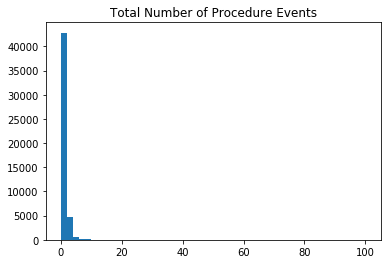

In [40]:
plt.hist(raw_completecase.NumProcEvents, bins = 50)
plt.title("Total Number of Procedure Events")

Text(0.5, 1.0, 'Total Number of Procedures')

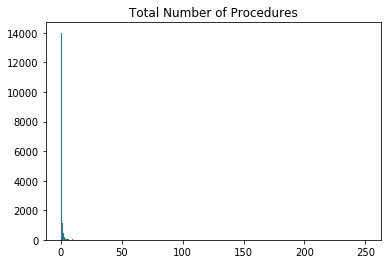

In [41]:
plt.hist(raw_completecase.NumProcs, bins = 1000)
plt.title("Total Number of Procedures")

Text(0.5, 1.0, 'Total Number of Rx')

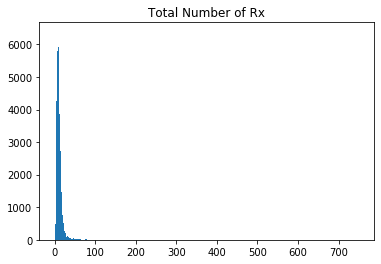

In [42]:
plt.hist(raw_completecase.NumRx, bins = 500)
plt.title("Total Number of Rx")

Text(0.5, 1.0, 'Total Number of Transfers')

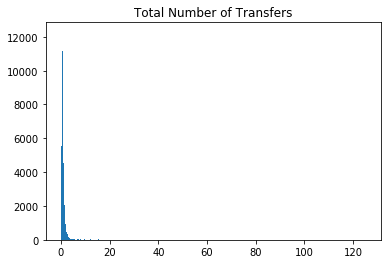

In [43]:
plt.hist(raw_completecase.NumTransfers, bins=500)
plt.title("Total Number of Transfers")

In [44]:
max(raw_completecase.NumTransfers)

125.0

Generally speaking a lot of these continuous predictors may have outliers.

In [45]:
raw_completecase.NumTransfers.describe()

count    48588.000000
mean         0.943240
std          2.088998
min          0.000000
25%          0.380000
50%          0.630000
75%          1.000000
max        125.000000
Name: NumTransfers, dtype: float64

Text(0.5, 1.0, 'Total Number of Interactions')

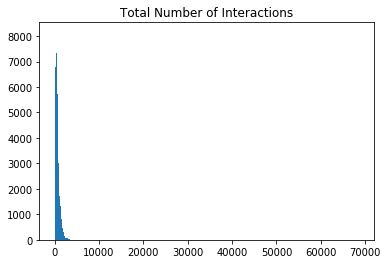

In [46]:
plt.hist(raw_completecase.TotalNumInteract, bins=500)
plt.title("Total Number of Interactions")

In [47]:
max(raw_completecase.TotalNumInteract)

68600.0

In [48]:
min(raw_completecase.TotalNumInteract)

0.0

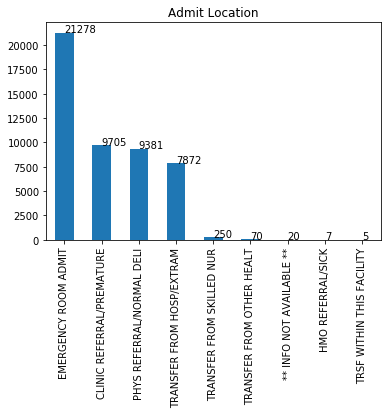

In [49]:
(raw_completecase.admit_location).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.admit_location.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Admit Location")

Maybe we need to perform ANOVA to find out which categories can be collapsed.

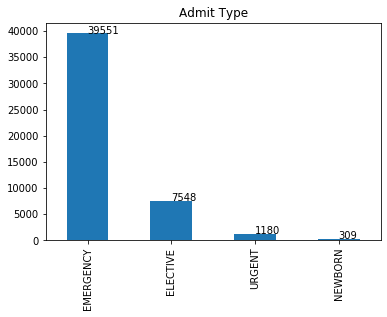

In [50]:
(raw_completecase.admit_type).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.admit_type.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Admit Type")

Imbalance heavily favoring emergency.

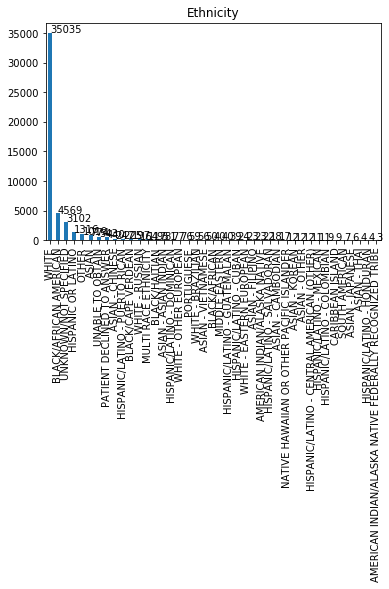

In [51]:
(raw_completecase.ethnicity).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.ethnicity.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Ethnicity")

Definitely consolidate.

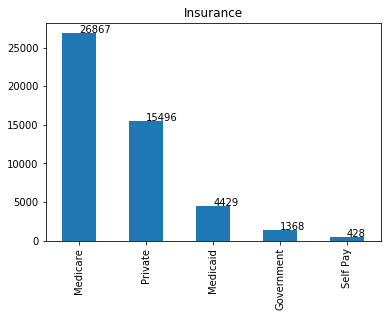

In [52]:
(raw_completecase.insurance).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.insurance.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Insurance")

Insurance is worth consolidating.

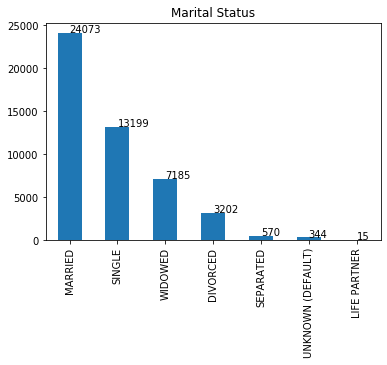

In [53]:
(raw_completecase.marital_status).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.marital_status.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Marital Status")

Also worth consolidating.

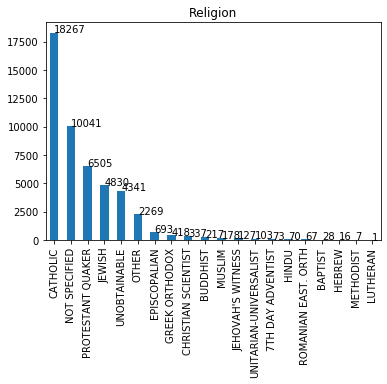

In [54]:
(raw_completecase.religion).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.religion.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Religion")

Definitely worth consolidating these religions.

## Consolidation:

In [55]:
raw.marital_status.unique()

array(['DIVORCED', 'SINGLE', 'MARRIED', nan, 'WIDOWED',
       'UNKNOWN (DEFAULT)', 'SEPARATED', 'LIFE PARTNER'], dtype=object)

In [56]:
raw_completecase.insurance.unique()

array(['Private', 'Medicaid', 'Medicare', 'Government', 'Self Pay'],
      dtype=object)

In [57]:
raw_completecase.loc[raw_completecase['insurance'].isin(['Private', 'Medicaid', 'Medicare', 'Government']), 'insurance'] = "INSURED"
raw_completecase.loc[raw_completecase['insurance'].isin(['Self Pay']), 'insurance'] = "UNINSURED"



/Users/dereklee/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [58]:
raw_completecase.insurance.unique()

array(['INSURED', 'UNINSURED'], dtype=object)

In [59]:
raw_completecase.loc[raw_completecase['marital_status'].isin(['LIFE PARTNER']), 'marital_status'] = "MARRIED"
raw_completecase.loc[raw_completecase['marital_status'].isin(['DIVORCED', 'SINGLE','WIDOWED','SEPARATED']), 'marital_status'] = "UNMARRIED"
raw_completecase.loc[raw_completecase['marital_status'].isin(['UNKNOWN (DEFAULT)']), 'marital_status'] = "UNKNOWN"


In [60]:
raw_completecase.marital_status.unique()

array(['UNMARRIED', 'MARRIED', 'UNKNOWN'], dtype=object)

In [61]:
raw_completecase.religion.unique()

array(['PROTESTANT QUAKER', 'NOT SPECIFIED', 'JEWISH', 'CATHOLIC',
       'EPISCOPALIAN', 'OTHER', 'UNOBTAINABLE', "JEHOVAH'S WITNESS",
       'UNITARIAN-UNIVERSALIST', 'LUTHERAN', 'CHRISTIAN SCIENTIST',
       'GREEK ORTHODOX', 'BUDDHIST', '7TH DAY ADVENTIST', 'MUSLIM',
       'HINDU', 'ROMANIAN EAST. ORTH', 'HEBREW', 'BAPTIST', 'METHODIST'],
      dtype=object)

In [62]:
# raw_completecase.religion = raw_completecase['religion'].replace(['PROTESTANT QUAKER', 'JEWISH', 'CATHOLIC',
#        'EPISCOPALIAN', 'OTHER', "JEHOVAH'S WITNESS",
#        'UNITARIAN-UNIVERSALIST', 'LUTHERAN', 'CHRISTIAN SCIENTIST',
#        'GREEK ORTHODOX', 'BUDDHIST', '7TH DAY ADVENTIST', 'MUSLIM',
#        'HINDU', 'ROMANIAN EAST. ORTH', 'HEBREW', 'BAPTIST', 'METHODIST'], 'RELIGIOUS')

# NAs might have been nonreligious...


raw_completecase.loc[raw_completecase["religion"].isin(['PROTESTANT QUAKER', 'JEWISH', 'CATHOLIC',
       'EPISCOPALIAN', 'OTHER', "JEHOVAH'S WITNESS",
       'UNITARIAN-UNIVERSALIST', 'LUTHERAN', 'CHRISTIAN SCIENTIST',
       'GREEK ORTHODOX', 'BUDDHIST', '7TH DAY ADVENTIST', 'MUSLIM',
       'HINDU', 'ROMANIAN EAST. ORTH', 'HEBREW', 'BAPTIST', 'METHODIST']), "religion"] = "RELIGIOUS"


raw_completecase.religion = raw_completecase['religion'].replace(['NOT SPECIFIED', 'UNOBTAINABLE'], "UNKNOWN")

raw_completecase.religion.unique()

/Users/dereklee/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['RELIGIOUS', 'UNKNOWN'], dtype=object)

In [63]:
raw_completecase['ethnicity'].value_counts()

WHITE                                                       35035
BLACK/AFRICAN AMERICAN                                       4569
UNKNOWN/NOT SPECIFIED                                        3102
HISPANIC OR LATINO                                           1316
OTHER                                                        1019
ASIAN                                                         774
UNABLE TO OBTAIN                                              543
PATIENT DECLINED TO ANSWER                                    440
ASIAN - CHINESE                                               247
HISPANIC/LATINO - PUERTO RICAN                                225
BLACK/CAPE VERDEAN                                            197
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          117
BLACK/HAITIAN                                                  95
ASIAN - ASIAN INDIAN                                           81
HISPANIC/L

In [64]:
raw_completecase['ethnicity'].unique()


array(['WHITE', 'BLACK/AFRICAN AMERICAN', 'HISPANIC OR LATINO',
       'UNKNOWN/NOT SPECIFIED', 'MULTI RACE ETHNICITY', 'WHITE - RUSSIAN',
       'OTHER', 'BLACK/CAPE VERDEAN', 'BLACK/HAITIAN', 'UNABLE TO OBTAIN',
       'ASIAN', 'HISPANIC/LATINO - SALVADORAN', 'WHITE - OTHER EUROPEAN',
       'HISPANIC/LATINO - PUERTO RICAN', 'HISPANIC/LATINO - GUATEMALAN',
       'PATIENT DECLINED TO ANSWER', 'WHITE - BRAZILIAN',
       'ASIAN - CHINESE', 'BLACK/AFRICAN',
       'AMERICAN INDIAN/ALASKA NATIVE', 'ASIAN - ASIAN INDIAN',
       'HISPANIC/LATINO - DOMINICAN',
       'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
       'ASIAN - OTHER', 'PORTUGUESE', 'HISPANIC/LATINO - CUBAN',
       'ASIAN - FILIPINO', 'WHITE - EASTERN EUROPEAN',
       'ASIAN - CAMBODIAN', 'ASIAN - VIETNAMESE',
       'HISPANIC/LATINO - COLOMBIAN', 'MIDDLE EASTERN',
       'HISPANIC/LATINO - HONDURAN', 'HISPANIC/LATINO - MEXICAN',
       'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'ASIAN - KOREAN',
       

In [65]:
raw_completecase.loc[raw_completecase['ethnicity'].isin(['ASIAN',
                                                        'ASIAN - CHINESE', 
                                                         'ASIAN - ASIAN INDIAN',
                                                        'ASIAN - OTHER',
                                                        'ASIAN - FILIPINO',
                                                        'ASIAN - CAMBODIAN', 
                                                        'ASIAN - VIETNAMESE',
                                                        'ASIAN - KOREAN',
                                                         'ASIAN - THAI', 
                                                         'ASIAN - JAPANESE',
                                                        'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER']), 'ethnicity'] = "ASIAN_PACIFICISLANDER"

raw_completecase.loc[raw_completecase['ethnicity'].isin(['HISPANIC/LATINO - SALVADORAN',
                                                        'HISPANIC/LATINO - PUERTO RICAN', 
                                                         'HISPANIC/LATINO - GUATEMALAN',
                                                        'HISPANIC/LATINO - DOMINICAN',
                                                        'HISPANIC/LATINO - CUBAN',
                                                        'HISPANIC/LATINO - COLOMBIAN',
                                                        'HISPANIC/LATINO - HONDURAN', 
                                                         'HISPANIC/LATINO - MEXICAN',
                                                        'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)', 
                                                         'SOUTH AMERICAN']), 'ethnicity'] = "HISPANIC OR LATINO"

raw_completecase.loc[raw_completecase['ethnicity'].isin(['WHITE - RUSSIAN',
                                                        'WHITE - OTHER EUROPEAN',
                                                        'WHITE - BRAZILIAN',
                                                        'PORTUGUESE',
                                                        'WHITE - EASTERN EUROPEAN']), 'ethnicity'] = "WHITE"

raw_completecase.loc[raw_completecase['ethnicity'].isin(['BLACK/AFRICAN AMERICAN',
                                                         'BLACK/CAPE VERDEAN', 
                                                         'BLACK/HAITIAN',
                                                        'BLACK/AFRICAN']), 'ethnicity'] = "BLACK"


raw_completecase.loc[raw_completecase['ethnicity'].isin(['MULTI RACE ETHNICITY',
                                                        'AMERICAN INDIAN/ALASKA NATIVE',
                                                        'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
                                                        'MIDDLE EASTERN',
                                                        'CARIBBEAN ISLAND']), 'ethnicity'] = "OTHER"

raw_completecase.loc[raw_completecase['ethnicity'].isin(['UNKNOWN/NOT SPECIFIED',
                                                        'UNABLE TO OBTAIN',
                                                        'PATIENT DECLINED TO ANSWER']), 'ethnicity'] = "UNKNOWN"


raw_completecase['gender'] = raw_completecase['gender'].replace('F', 0)
raw_completecase['gender'] = raw_completecase['gender'].replace('M', 1)


/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [66]:
raw_completecase['gender'].unique()

array([0, 1])

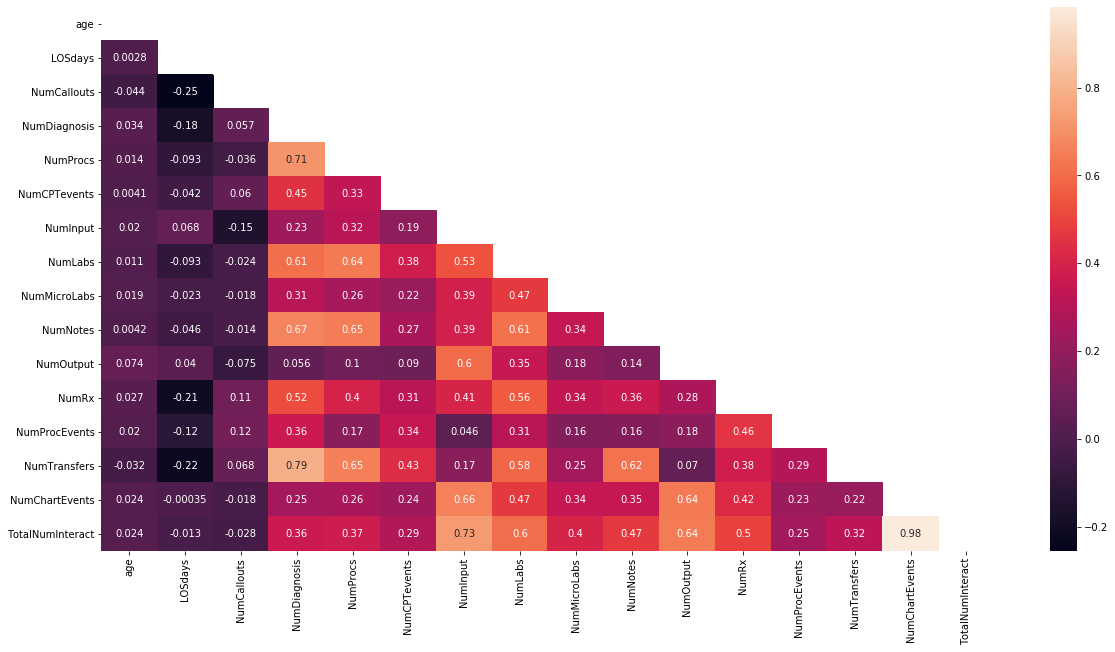

In [89]:
import seaborn as sns
continuous = raw_completecase[['age', 'LOSdays', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
                              'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents','TotalNumInteract']]
a4_dims = (20, 10)
corrMatrix=continuous.corr()
mask_ut=np.triu(np.ones(corrMatrix.shape)).astype(np.bool)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corrMatrix,mask=mask_ut,annot=True)
plt.show()

`NumTransfers` and `NumDiagnosis` = 0.79  
`NumProcs` and `NumDiagnosis` = 0.71  
`TotalNumInteract` and `NumInput` = 0.73  
`NumChartEvents` and `TotalNumInteract` = 0.98  

To drop: `NumDiagnosis` and `TotalNumInteract`


## Final Dataset:

In [67]:
raw_completecase.columns

Index(['hadm_id', 'gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [68]:
raw_completecase.admit_location.unique()

array(['CLINIC REFERRAL/PREMATURE', 'EMERGENCY ROOM ADMIT',
       'TRANSFER FROM HOSP/EXTRAM', 'PHYS REFERRAL/NORMAL DELI',
       'TRANSFER FROM SKILLED NUR', 'TRANSFER FROM OTHER HEALT',
       'HMO REFERRAL/SICK', '** INFO NOT AVAILABLE **',
       'TRSF WITHIN THIS FACILITY'], dtype=object)

In [90]:
# Not using AdmitDiagnosis nor AdmitProcedure nor LOSgroupNum nor admit_type (all are EMERGENCY)

to_dummify_simple = ['admit_location', 'insurance', 'religion', 'marital_status','ethnicity']

simple_data = raw_completecase[['gender', 'age', 'LOSdays', 'admit_location', 'admit_type',
        'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumProcs',
       'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital']]

simple_data = simple_data[simple_data.ExpiredHospital==0]
simple_data = simple_data[simple_data.admit_type=="EMERGENCY"]

simple_data_dummified = pd.get_dummies(simple_data, prefix=to_dummify_simple, columns=to_dummify_simple)

simple_data_dummified.drop(columns="admit_type", inplace=True)




In [91]:
simple_data_dummified = pd.get_dummies(simple_data, prefix=to_dummify_simple, columns=to_dummify_simple)

simple_data_dummified.drop(columns="admit_type", inplace=True)

In [92]:
simple_data_dummified.shape

(34732, 38)

In [128]:
simple_data_dummified.describe()

,gender,age,LOSdays,NumCallouts,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,admit_location_** INFO NOT AVAILABLE **,admit_location_CLINIC REFERRAL/PREMATURE,admit_location_EMERGENCY ROOM ADMIT,admit_location_HMO REFERRAL/SICK,admit_location_PHYS REFERRAL/NORMAL DELI,admit_location_TRANSFER FROM HOSP/EXTRAM,admit_location_TRANSFER FROM OTHER HEALT,admit_location_TRANSFER FROM SKILLED NUR,admit_location_TRSF WITHIN THIS FACILITY,insurance_INSURED,insurance_UNINSURED,religion_RELIGIOUS,religion_UNKNOWN,marital_status_MARRIED,marital_status_UNKNOWN,marital_status_UNMARRIED,ethnicity_ASIAN_PACIFICISLANDER,ethnicity_BLACK,ethnicity_HISPANIC OR LATINO,ethnicity_OTHER,ethnicity_UNKNOWN,ethnicity_WHITE
count,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.0,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000
mean,0.557958,60.622481,10.035817,0.132976,0.537245,1.194516,23.630659,43.523157,1.183772,1.196424,6.890776,9.659569,0.636904,0.790789,491.907526,0.0,0.000086,0.248445,0.534896,0.000029,0.031930,0.177876,0.001267,0.005327,0.000144,0.989980,0.010020,0.700795,0.299205,0.470028,0.006593,0.523379,0.024099,0.114419,0.039330,0.024387,0.071836,0.725930
std,0.496637,16.733405,10.379040,0.179796,0.809801,1.247863,31.709585,22.468788,1.961472,8.394888,5.695556,6.268736,1.068615,0.967359,469.492242,0.0,0.009294,0.432118,0.498788,0.005366,0.175817,0.382414,0.035571,0.072789,0.011998,0.099597,0.099597,0.457917,0.457917,0.499108,0.080932,0.499460,0.153358,0.318324,0.194381,0.154249,0.258220,0.446051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50.000000,4.000000,0.000000,0.170000,0.590000,5.300000,32.150000,0.250000,0.130000,2.600000,6.270000,0.000000,0.370000,227.892500,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,62.000000,6.960000,0.090000,0.370000,1.190000,12.480000,40.350000,0.690000,0.310000,5.500000,8.910000,0.000000,0.600000,403.410000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,74.000000,12.040000,0.200000,0.650000,1.640000,29.430000,50.650000,1.490000,0.760000,9.800000,12.050000,1.030000,0.970000,660.360000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,89.000000,202.750000,4.000000,50.000000,175.000000,675.450000,1061.540000,164.000000,625.000000,62.400000,175.000000,30.770000,75.000000,31642.880000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
y = simple_data_dummified.LOSdays
X = simple_data_dummified.loc[:, simple_data_dummified.columns != 'LOSdays']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
import numpy as np
from sklearn import metrics
import seaborn as sns

def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

# XGBoost:

In [95]:
import time
start_time = time.time()

from xgboost import XGBRegressor, plot_importance

xgbmodel = XGBRegressor()
xgbmodel.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.8776419162750244 seconds ---


In [96]:
# make predictions for test data
y_pred_xgb = xgbmodel.predict(X_test)
predictions_xgb = [round(value) for value in y_pred_xgb ]

mae_xgb = metrics.mean_absolute_error(y_test, predictions_xgb)
mse_xgb = metrics.mean_squared_error(y_test, predictions_xgb)
print("Mean Absolute Error XGBoost: ", mae_xgb)
print("Mean Squared Error XGBoost: ", mse_xgb)
print('Root Mean Squared Error XGBoost:', np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb)))
print("Explained Variance Score XGBoost:", metrics.explained_variance_score(predictions_xgb, y_test))

Mean Absolute Error XGBoost:  1.8452814164387505
Mean Squared Error XGBoost:  15.309598632503238
Root Mean Squared Error XGBoost: 3.9127482199220585
Explained Variance Score XGBoost: 0.8348743327735204


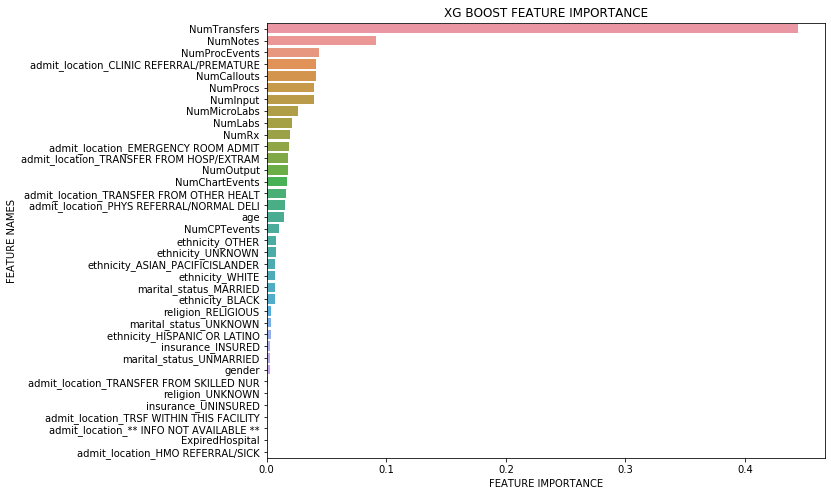

In [97]:
features_xgb = simple_data_dummified.loc[:, simple_data_dummified.columns != 'LOSdays'].columns

plot_feature_importance(xgbmodel.feature_importances_,features_xgb,'XG BOOST ')

In [77]:
predictions_xgb

[8.0,
 11.0,
 3.0,
 30.0,
 4.0,
 8.0,
 4.0,
 5.0,
 9.0,
 6.0,
 2.0,
 4.0,
 12.0,
 10.0,
 6.0,
 12.0,
 12.0,
 9.0,
 9.0,
 2.0,
 3.0,
 9.0,
 3.0,
 17.0,
 4.0,
 5.0,
 4.0,
 14.0,
 18.0,
 16.0,
 7.0,
 10.0,
 5.0,
 8.0,
 15.0,
 4.0,
 13.0,
 9.0,
 2.0,
 51.0,
 6.0,
 10.0,
 3.0,
 15.0,
 5.0,
 8.0,
 18.0,
 19.0,
 3.0,
 14.0,
 0.0,
 3.0,
 15.0,
 8.0,
 5.0,
 3.0,
 6.0,
 2.0,
 1.0,
 30.0,
 54.0,
 11.0,
 6.0,
 6.0,
 7.0,
 6.0,
 3.0,
 8.0,
 38.0,
 2.0,
 12.0,
 4.0,
 13.0,
 9.0,
 9.0,
 10.0,
 17.0,
 8.0,
 4.0,
 10.0,
 8.0,
 5.0,
 4.0,
 1.0,
 6.0,
 5.0,
 5.0,
 12.0,
 4.0,
 14.0,
 4.0,
 1.0,
 5.0,
 9.0,
 25.0,
 20.0,
 4.0,
 7.0,
 4.0,
 15.0,
 13.0,
 16.0,
 34.0,
 7.0,
 7.0,
 15.0,
 29.0,
 8.0,
 4.0,
 4.0,
 32.0,
 4.0,
 3.0,
 2.0,
 3.0,
 10.0,
 14.0,
 5.0,
 10.0,
 23.0,
 11.0,
 7.0,
 3.0,
 21.0,
 13.0,
 6.0,
 10.0,
 7.0,
 8.0,
 6.0,
 6.0,
 5.0,
 5.0,
 7.0,
 11.0,
 3.0,
 6.0,
 13.0,
 23.0,
 16.0,
 9.0,
 4.0,
 7.0,
 11.0,
 13.0,
 7.0,
 24.0,
 13.0,
 7.0,
 8.0,
 28.0,
 10.0,
 34.0,
 19.0,
 33.0,
 7.0,
 8.

In [98]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = metrics.mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 6.47


## Hyperparameter tuning

In [86]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

params['eval_metric'] = "mae"

num_boost_round = 999

In [119]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [88]:
xgbmodel_tuned = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best MAE: {:.2f} with {} rounds".format(
                 xgbmodel_tuned.best_score,
                 xgbmodel_tuned.best_iteration+1))

[14:45:41] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:6.75765
[1]	Test-mae:4.74244
[2]	Test-mae:3.43764
[3]	Test-mae:2.64205
[4]	Test-mae:2.19912
[5]	Test-mae:1.96614
[6]	Test-mae:1.86038
[7]	Test-mae:1.81767
[8]	Test-mae:1.79652
[9]	Test-mae:1.77422
[10]	Test-mae:1.76072
[11]	Test-mae:1.74991
[12]	Test-mae:1.75103
[13]	Test-mae:1.74137
[14]	Test-mae:1.73964
[15]	Test-mae:1.72062
[16]	Test-mae:1.71310
[17]	Test-mae:1.71189
[18]	Test-mae:1.70904
[19]	Test-mae:1.71381
[20]	Test-mae:1.71129
[21]	Test-mae:1.70796
[22]	Test-mae:1.70694
[23]	Test-mae:1.69861
[24]	Test-mae:1.69886
[25]	Test-mae:1.69954
[26]	Test-mae:1.69967
[27]	Test-mae:1.69827
[28]	Test-mae:1.69752
[29]	Test-mae:1.69824
[30]	Test-mae:1.69809
[31]	Test-mae:1.69536
[32]	Test-mae:1.69503
[33]	Test-mae:1.69630
[34]	Test-mae:1.68932
[35]	Test-mae:1.68871
[36]	Test-mae:1.68862
[37]	Test-mae:1.68835
[38]	Test-mae:1.68747
[39

In [99]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[15:15:12] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:12] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:12] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:12] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:12] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,6.680809,0.027580,6.684954,0.112629
1,4.708768,0.019237,4.724595,0.082149
2,3.396555,0.017401,3.436696,0.053943
3,2.588435,0.018873,2.668793,0.044189
4,2.129591,0.023280,2.254970,0.028854
5,1.882957,0.022062,2.037519,0.024983
6,1.754390,0.019380,1.932415,0.022696
7,1.677780,0.017140,1.876430,0.022666
8,1.630119,0.017277,1.845855,0.020588
9,1.596206,0.015883,1.827863,0.018545


In [100]:
cv_results['test-mae-mean'].min()

1.6964164

In [101]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [102]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))


CV with max_depth=9, min_child_weight=5
[15:16:57] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:57] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:57] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:57] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:57] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 1.6184516000000002 for 10 rounds
CV with max_depth=9, min_child_weight=6
[15:17:00] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:00] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:00] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:00] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:01] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 1.6138835999999999 for 11 rounds
CV with max_depth=9, min_child_weight=7
[15:17:04] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linea

In [103]:
params['max_depth'] = 11
params['min_child_weight'] = 6

In [105]:
# Tune subsample: corresponds to the fraction of observations (the rows) to subsample at each step. 
# By default it is set to 1 meaning that we use all rows.

# Tune colsample_bytree: corresponds to the fraction of features (the columns) to use. 
# By default it is set to 1 meaning that we will use all features. 

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[15:20:53] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:53] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:53] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:53] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:54] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 1.5953544000000002 for 10 rounds
CV with subsample=1.0, colsample=0.9
[15:20:57] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:58] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:58] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:58] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:58] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 1.6046100000000003 for 11 rounds
CV with subsample=1.0, colsample=0.8
[15:21:02] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is n

[15:21:42] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:42] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:42] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:42] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 1.7894008 for 18 rounds
CV with subsample=0.7, colsample=1.0
[15:21:46] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:46] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:46] WARNING: /Users/travis/build/

In [106]:
params['subsample'] = 1.
params['colsample_bytree'] = 1.

In [111]:
# Tune eta - learning rate

%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round, seed=42, nfold=5, metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs
CV with eta=0.3
[15:24:41] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:41] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:41] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:41] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:41] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 26.3 s, sys: 567 ms, total: 26.8 s
Wall time: 3.81 s
	MAE 1.5953544000000002 for 10 rounds

CV with eta=0.2
[15:24:45] WARNING: /Users/travis/build/dmlc/xgboos

/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  from ipykernel import kernelapp as app


[15:24:45] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:45] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:45] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 42.9 s, sys: 366 ms, total: 43.3 s
Wall time: 5.55 s
	MAE 1.5483566 for 19 rounds

CV with eta=0.1
[15:24:51] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:51] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:51] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squar

In [112]:
params['eta'] = 0.005

In [113]:
params

{'max_depth': 11,
 'min_child_weight': 6,
 'eta': 0.005,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [120]:
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)


[15:43:20] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:9.58095
[1]	Test-mae:9.53398
[2]	Test-mae:9.48725
[3]	Test-mae:9.44048
[4]	Test-mae:9.39409
[5]	Test-mae:9.34799
[6]	Test-mae:9.30207
[7]	Test-mae:9.25627
[8]	Test-mae:9.21081
[9]	Test-mae:9.16547
[10]	Test-mae:9.12038
[11]	Test-mae:9.07561
[12]	Test-mae:9.03086
[13]	Test-mae:8.98646
[14]	Test-mae:8.94243
[15]	Test-mae:8.89828
[16]	Test-mae:8.85460
[17]	Test-mae:8.81108
[18]	Test-mae:8.76766
[19]	Test-mae:8.72466
[20]	Test-mae:8.68180
[21]	Test-mae:8.63904
[22]	Test-mae:8.59652
[23]	Test-mae:8.55434
[24]	Test-mae:8.51231
[25]	Test-mae:8.47055
[26]	Test-mae:8.42893
[27]	Test-mae:8.38758
[28]	Test-mae:8.34638
[29]	Test-mae:8.30557
[30]	Test-mae:8.26481
[31]	Test-mae:8.22437
[32]	Test-mae:8.18438
[33]	Test-mae:8.14451
[34]	Test-mae:8.10458
[35]	Test-mae:8.06522
[36]	Test-mae:8.02580
[37]	Test-mae:7.98672
[38]	Test-mae:7.94770
[39

[355]	Test-mae:2.14922
[356]	Test-mae:2.14391
[357]	Test-mae:2.13884
[358]	Test-mae:2.13385
[359]	Test-mae:2.12885
[360]	Test-mae:2.12379
[361]	Test-mae:2.11897
[362]	Test-mae:2.11427
[363]	Test-mae:2.10942
[364]	Test-mae:2.10460
[365]	Test-mae:2.09992
[366]	Test-mae:2.09510
[367]	Test-mae:2.09041
[368]	Test-mae:2.08574
[369]	Test-mae:2.08115
[370]	Test-mae:2.07658
[371]	Test-mae:2.07208
[372]	Test-mae:2.06757
[373]	Test-mae:2.06309
[374]	Test-mae:2.05876
[375]	Test-mae:2.05428
[376]	Test-mae:2.04969
[377]	Test-mae:2.04525
[378]	Test-mae:2.04108
[379]	Test-mae:2.03686
[380]	Test-mae:2.03265
[381]	Test-mae:2.02847
[382]	Test-mae:2.02438
[383]	Test-mae:2.02025
[384]	Test-mae:2.01613
[385]	Test-mae:2.01215
[386]	Test-mae:2.00811
[387]	Test-mae:2.00413
[388]	Test-mae:2.00008
[389]	Test-mae:1.99630
[390]	Test-mae:1.99240
[391]	Test-mae:1.98858
[392]	Test-mae:1.98469
[393]	Test-mae:1.98084
[394]	Test-mae:1.97706
[395]	Test-mae:1.97321
[396]	Test-mae:1.96955
[397]	Test-mae:1.96571
[398]	Test-

[712]	Test-mae:1.61526
[713]	Test-mae:1.61514
[714]	Test-mae:1.61511
[715]	Test-mae:1.61505
[716]	Test-mae:1.61493
[717]	Test-mae:1.61485
[718]	Test-mae:1.61482
[719]	Test-mae:1.61469
[720]	Test-mae:1.61464
[721]	Test-mae:1.61460
[722]	Test-mae:1.61460
[723]	Test-mae:1.61445
[724]	Test-mae:1.61444
[725]	Test-mae:1.61434
[726]	Test-mae:1.61434
[727]	Test-mae:1.61429
[728]	Test-mae:1.61431
[729]	Test-mae:1.61421
[730]	Test-mae:1.61415
[731]	Test-mae:1.61410
[732]	Test-mae:1.61404
[733]	Test-mae:1.61400
[734]	Test-mae:1.61397
[735]	Test-mae:1.61390
[736]	Test-mae:1.61379
[737]	Test-mae:1.61374
[738]	Test-mae:1.61377
[739]	Test-mae:1.61381
[740]	Test-mae:1.61378
[741]	Test-mae:1.61378
[742]	Test-mae:1.61376
[743]	Test-mae:1.61372
[744]	Test-mae:1.61375
[745]	Test-mae:1.61372
[746]	Test-mae:1.61369
[747]	Test-mae:1.61366
[748]	Test-mae:1.61365
[749]	Test-mae:1.61354
[750]	Test-mae:1.61348
[751]	Test-mae:1.61349
[752]	Test-mae:1.61346
[753]	Test-mae:1.61335
[754]	Test-mae:1.61329
[755]	Test-

In [131]:
metrics.mean_absolute_error(best_model.predict(dtrain), y_train)



0.6527192481797238

In [121]:
metrics.mean_absolute_error(best_model.predict(dtest), y_test)



1.6227143791459078

In [130]:
print("Explained Variance Score XGBoost:", metrics.explained_variance_score(best_model.predict(dtest), y_test))

Explained Variance Score XGBoost: 0.8348383870466224


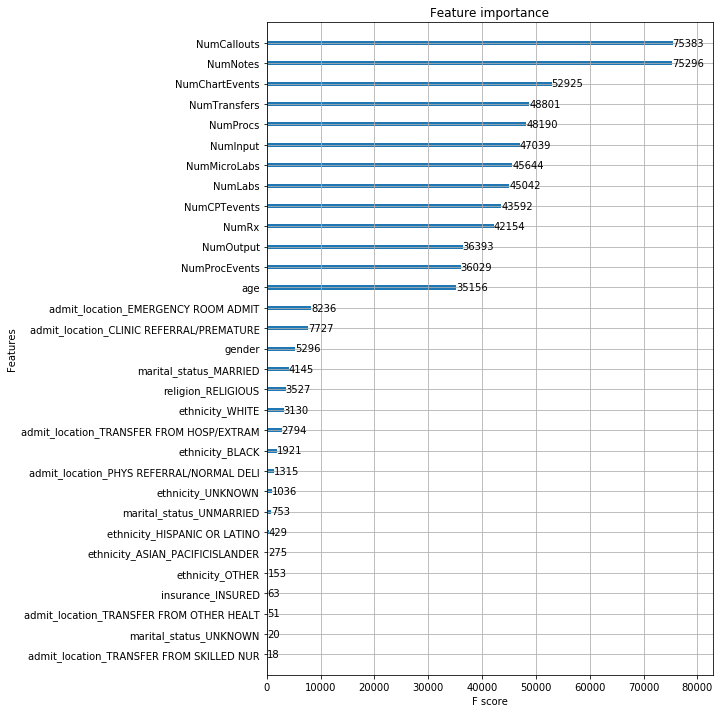

In [125]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(8, 12))
plot_importance(best_model, ax=ax)

In [126]:
best_model.save_model("xgb_best.model")

In [127]:
loaded_model = xgb.Booster()
loaded_model.load_model("xgb_best.model")
# And use it for predictions.
loaded_model.predict(dtest)

[16:17:22] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


array([8.81342220e+00, 1.01060705e+01, 2.80682826e+00, 3.28840714e+01,
       4.16119719e+00, 6.33781481e+00, 4.57274151e+00, 4.25760221e+00,
       1.46738176e+01, 4.85556602e+00, 1.79418874e+00, 4.02597046e+00,
       1.05019655e+01, 1.17896051e+01, 6.19774628e+00, 1.15037460e+01,
       1.00708160e+01, 1.08547773e+01, 7.83386850e+00, 2.05511498e+00,
       2.78568292e+00, 9.65842533e+00, 3.13812876e+00, 1.26730366e+01,
       3.30528569e+00, 4.80190706e+00, 4.62826729e+00, 1.51119022e+01,
       1.88358822e+01, 1.44956532e+01, 7.64962912e+00, 1.00003767e+01,
       6.48407125e+00, 7.21388245e+00, 1.08193073e+01, 4.15741730e+00,
       1.06799755e+01, 8.75454330e+00, 1.87719190e+00, 2.76599579e+01,
       6.63656282e+00, 9.33401108e+00, 3.59802175e+00, 1.38022985e+01,
       6.07776260e+00, 6.88904285e+00, 1.52885618e+01, 1.61963120e+01,
       3.94837117e+00, 1.19350500e+01, 6.46408558e-01, 4.06494522e+00,
       1.34260960e+01, 7.31681585e+00, 4.67913246e+00, 2.76829839e+00,
      

## Removing some overlapping transfer vars:

In [332]:
# Not using AdmitDiagnosis nor AdmitProcedure nor LOSgroupNum nor admit_type (all are EMERGENCY)

to_dummify_simple = ['admit_location', 'insurance', 'religion', 'marital_status','ethnicity']

simple_data_lesstransfer = raw_completecase[['gender', 'age', 'LOSdays', 'admit_location', 'admit_type',
        'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract']]

simple_data_lesstransfer = simple_data_lesstransfer[simple_data_lesstransfer.ExpiredHospital==0]
simple_data_lesstransfer = simple_data_lesstransfer[simple_data_lesstransfer.admit_type=="EMERGENCY"]


simple_data_lesstransfer_dummified = pd.get_dummies(simple_data_lesstransfer, prefix=to_dummify_simple, columns=to_dummify_simple)

simple_data_lesstransfer_dummified.drop(columns="admit_type", inplace=True)

simple_data_lesstransfer_dummified.columns


Index(['gender', 'age', 'LOSdays', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes',
       'NumOutput', 'NumRx', 'NumProcEvents', 'NumChartEvents',
       'ExpiredHospital', 'TotalNumInteract',
       'admit_location_** INFO NOT AVAILABLE **',
       'admit_location_CLINIC REFERRAL/PREMATURE',
       'admit_location_EMERGENCY ROOM ADMIT',
       'admit_location_HMO REFERRAL/SICK',
       'admit_location_PHYS REFERRAL/NORMAL DELI',
       'admit_location_TRANSFER FROM HOSP/EXTRAM',
       'admit_location_TRANSFER FROM OTHER HEALT',
       'admit_location_TRANSFER FROM SKILLED NUR',
       'admit_location_TRSF WITHIN THIS FACILITY', 'insurance_INSURED',
       'insurance_UNINSURED', 'religion_RELIGIOUS', 'religion_UNKNOWN',
       'marital_status_MARRIED', 'marital_status_UNKNOWN',
       'marital_status_UNMARRIED', 'ethnicity_ASIAN_PACIFICISLANDER',
       'ethnicity_BLACK', 'ethnicity_HISPANIC OR LATINO', 'ethnicity_OT

In [333]:
y_lesstransfer = simple_data_lesstransfer_dummified.LOSdays
X_lesstransfer = simple_data_lesstransfer_dummified.loc[:, simple_data_lesstransfer_dummified.columns != 'LOSdays']

X_train_lesstransfer, X_test_lesstransfer, y_train_lesstransfer, y_test_lesstransfer = train_test_split(X_lesstransfer,
                                                                                                        y_lesstransfer, 
                                                                                                        test_size=0.2, 
                                                                                                        random_state=42)



In [334]:
start_time = time.time()
xgbmodel_lesstransfer = XGBRegressor()
xgbmodel_lesstransfer.fit(X_train_lesstransfer, y_train_lesstransfer)

print("--- %s seconds ---" % (time.time() - start_time))

--- 2.0733399391174316 seconds ---


In [335]:
# make predictions for test data
y_pred_xgb_lesstransfer = xgbmodel_lesstransfer.predict(X_test_lesstransfer)
predictions_xgb_lesstransfer = [round(value) for value in y_pred_xgb_lesstransfer ]

mae_xgb_lesstransfer = metrics.mean_absolute_error(y_test_lesstransfer, predictions_xgb_lesstransfer)
mse_xgb_lesstransfer = metrics.mean_squared_error(y_test_lesstransfer, predictions_xgb_lesstransfer)
print("Mean Absolute Error XGBoost: ", mae_xgb_lesstransfer)
print("Mean Squared Error XGBoost: ", mse_xgb_lesstransfer)
print('Root Mean Squared Error XGBoost:', np.sqrt(metrics.mean_squared_error(y_test_lesstransfer, 
                                                                             predictions_xgb_lesstransfer)))
print("Explained Variance Score XGBoost:", metrics.explained_variance_score(predictions_xgb_lesstransfer, 
                                                                            y_test_lesstransfer))

Mean Absolute Error XGBoost:  1.833736864833741
Mean Squared Error XGBoost:  12.94763231610767
Root Mean Squared Error XGBoost: 3.5982818561235126
Explained Variance Score XGBoost: 0.8630122435987698


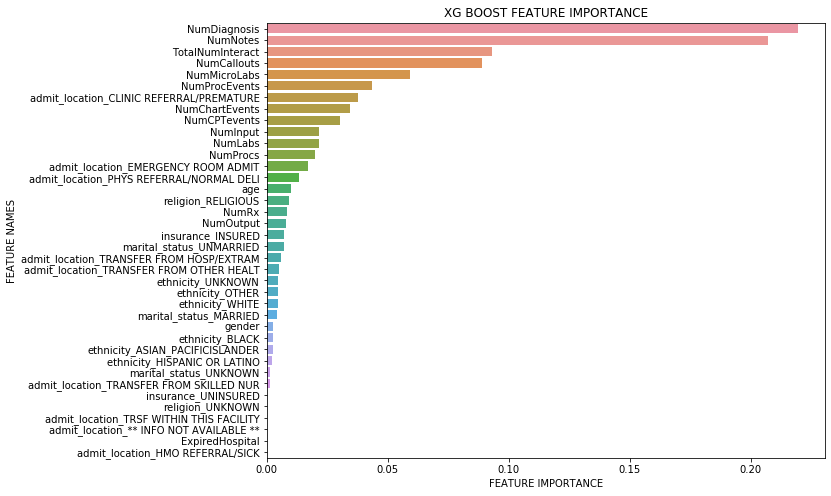

In [336]:
features_xgb_lesstransfer = simple_data_lesstransfer_dummified.loc[:, 
                                                                   simple_data_lesstransfer_dummified.columns != 'LOSdays'].columns

plot_feature_importance(xgbmodel_lesstransfer.feature_importances_,features_xgb_lesstransfer,'XG BOOST ')

In [331]:
features_xgb_lesstransfer

Index(['gender', 'age', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes',
       'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers', 'NumChartEvents',
       'ExpiredHospital', 'TotalNumInteract',
       'admit_location_** INFO NOT AVAILABLE **',
       'admit_location_CLINIC REFERRAL/PREMATURE',
       'admit_location_EMERGENCY ROOM ADMIT',
       'admit_location_HMO REFERRAL/SICK',
       'admit_location_PHYS REFERRAL/NORMAL DELI',
       'admit_location_TRANSFER FROM HOSP/EXTRAM',
       'admit_location_TRANSFER FROM OTHER HEALT',
       'admit_location_TRANSFER FROM SKILLED NUR',
       'admit_location_TRSF WITHIN THIS FACILITY', 'insurance_INSURED',
       'insurance_UNINSURED', 'religion_RELIGIOUS', 'religion_UNKNOWN',
       'marital_status_MARRIED', 'marital_status_UNKNOWN',
       'marital_status_UNMARRIED', 'ethnicity_ASIAN_PACIFICISLANDER',
       'ethnicity_BLACK', 'ethnicity_HISPANIC OR LATINO', 'ethnici

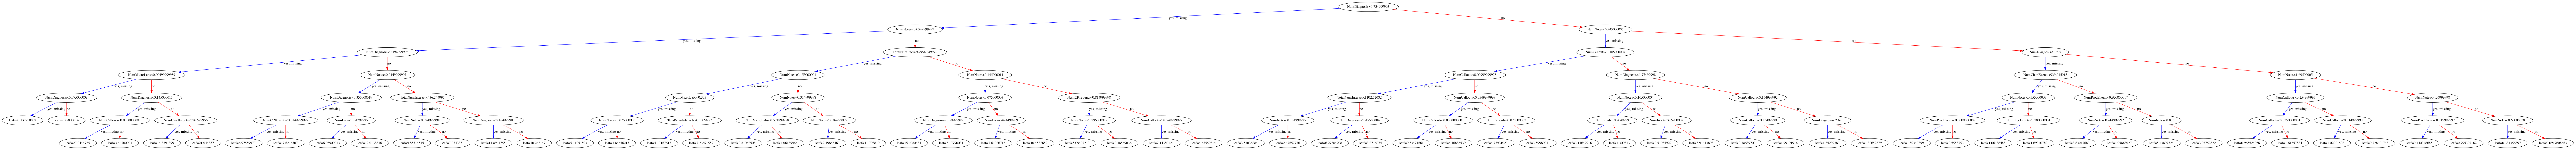

In [345]:
# !pip install graphviz
from xgboost import plot_tree
plot_tree(xgbmodel_lesstransfer)
fig = plt.gcf()
fig.set_size_inches(300, 200)
# plt.figure(figsize=(10,8))
# plt.show()